## Comparision of performance between Logistic regression model and Neural network models.

In this notebook we will import the data that was generated in WE04a-NN-Data-Gen notebook. Using this data set, I will fit the logistic regression and neural network model to analyse their performance.

### Import modules and set random seed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import collections

np.random.seed(86089106)

### Load data from CSV file into dataframe

In [2]:
df = pd.read_csv('WE02_data_set.csv')

### Conduct an initial exploration of the data

In [3]:
# displaying the first 4 rows of the dataframe
df.head(4)

,input,target
0,50.336125,0
1,12.923572,0
2,56.343662,1
3,51.999947,0


In [4]:
# checking the dimension of the dataframe
df.shape

(1000, 2)

In [5]:
#checking the data types of the columns
df.dtypes

input     float64
target      int64
dtype: object

In [6]:
# statistical summary of the data
df.describe()

,input,target
count,1000.000000,1000.000000
mean,53.748679,0.466000
std,25.658092,0.499092
min,6.358192,0.000000
25%,32.296775,0.000000
50%,52.238797,0.000000
75%,75.097647,1.000000
max,103.675457,1.000000


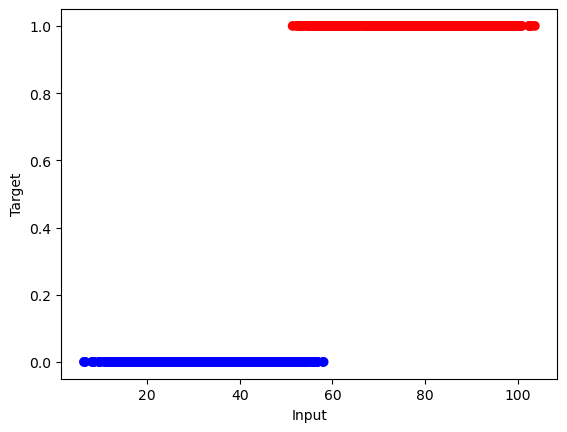

In [7]:
# scatter plot of the data

fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["blue", "red"])
ax.scatter(df['input'], df['target'], c=colors[np.ravel(df['target'].astype(int))])
ax.set_xlabel('Input')
ax.set_ylabel('Target')
plt.show()

### Splitting the data into train and test 

#### To avoid overfitting, we will use a cross validation approach. This involves randoming splitting the data into a training and test dataset. We will use 75/25 here.

In [8]:
X = df[['input']]
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =1)

In [9]:
# Creating a dataframe to store the results of the models
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### Fitting Logistic regression model

In [10]:
log_reg = LogisticRegression().fit(X_train, np.ravel(y_train))
_ = log_reg.fit(X_train, np.ravel(y_train))

In [11]:
%%time

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9776    0.9850    0.9813       133
           1     0.9828    0.9744    0.9785       117

    accuracy                         0.9800       250
   macro avg     0.9802    0.9797    0.9799       250
weighted avg     0.9800    0.9800    0.9800       250

CPU times: user 9.29 ms, sys: 7.03 ms, total: 16.3 ms
Wall time: 5.98 ms


[('target', 1)]


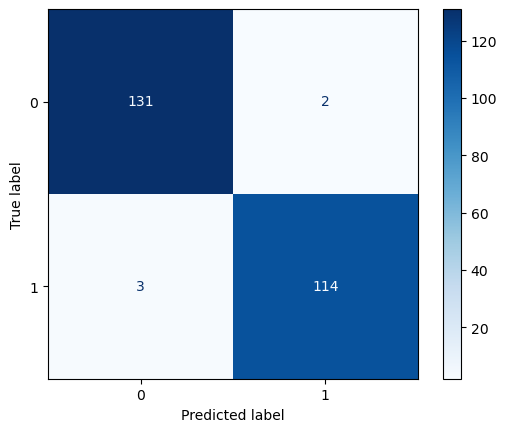

In [12]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
# Deriving and storing the metrics
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

performance = pd.concat([performance, pd.DataFrame({'model':"logistic regression", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

performance

,model,Accuracy,Precision,Recall,F1
0,logistic regression,0.98,0.982759,0.974359,0.978541


### Neural network model (MLP Classifier)

In [14]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=200)
_ = ann.fit(X_train, np.ravel(y_train))

CPU times: user 1.71 s, sys: 2.74 s, total: 4.45 s
Wall time: 615 ms


In [15]:
%%time
y_pred = ann.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9493    0.9850    0.9668       133
           1     0.9821    0.9402    0.9607       117

    accuracy                         0.9640       250
   macro avg     0.9657    0.9626    0.9637       250
weighted avg     0.9647    0.9640    0.9639       250

CPU times: user 17.4 ms, sys: 21.6 ms, total: 39 ms
Wall time: 14.1 ms


[('target', 1)]


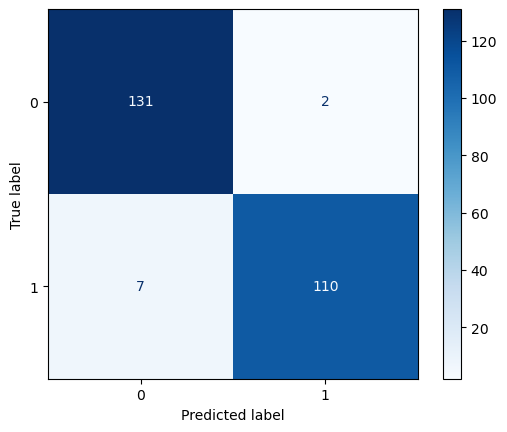

In [16]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [17]:
# Deriving and storing the metrics
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

performance = pd.concat([performance, pd.DataFrame({'model':"Neural network default", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

performance

,model,Accuracy,Precision,Recall,F1
0,logistic regression,0.980,0.982759,0.974359,0.978541
0,Neural network default,0.964,0.982143,0.940171,0.960699


### Neural network with RandomSearchCV 

In [20]:
%%time

score_measure = "accuracy"
kfolds = 4

param_grid = {
    'hidden_layer_sizes': [ (32,), (64,), (32,16), (64,32)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.1, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [9000]
}


ann = MLPClassifier(random_state=1)
rand_search = RandomizedSearchCV(
    estimator = ann,                    # the model to use
    param_distributions=param_grid,     # the parameter grid
    cv=kfolds,                      # number of folds
    n_iter=200,                     # number of iterations; this is the number of parameter settings that are sampled
    scoring=score_measure,          # score measure used to evaluate parameter combinations
    verbose=0,                      # verbose level; the higher, the more messages. 0 for no messages
    n_jobs=-1,                      # number of parallel jobs to run >> n_jobs=-1 will utilize all available CPUs 
    random_state=1                  # random state ensures that the splits are the same for each iteration
)

rand_search.fit(X_train, np.ravel(y_train))

bestMLPClassifier = rand_search.best_estimator_

print(rand_search.best_params_)

{'solver': 'adam', 'max_iter': 9000, 'learning_rate_init': 0.0001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (64, 32), 'alpha': 0.1, 'activation': 'logistic'}
CPU times: user 6.18 s, sys: 9.86 s, total: 16 s
Wall time: 1min 40s


In [22]:
%%time
y_pred = bestMLPClassifier.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9776    0.9850    0.9813       133
           1     0.9828    0.9744    0.9785       117

    accuracy                         0.9800       250
   macro avg     0.9802    0.9797    0.9799       250
weighted avg     0.9800    0.9800    0.9800       250

CPU times: user 19 ms, sys: 28.6 ms, total: 47.6 ms
Wall time: 16 ms


[('target', 1)]


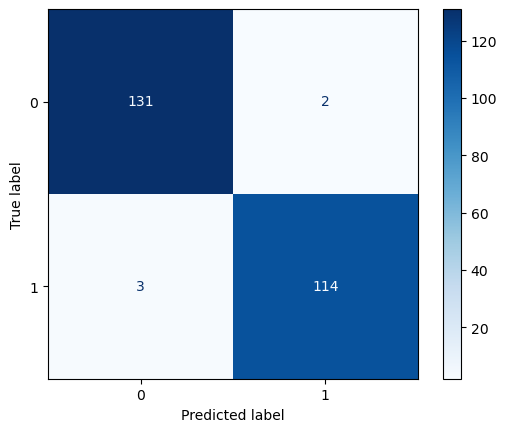

In [23]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [24]:
# Deriving and storing the metrics
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

performance = pd.concat([performance, pd.DataFrame({'model':"Neural network RandomSearchCV", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

performance

,model,Accuracy,Precision,Recall,F1
0,logistic regression,0.980,0.982759,0.974359,0.978541
0,Neural network default,0.964,0.982143,0.940171,0.960699
0,Neural network RandomSearchCV,0.980,0.982759,0.974359,0.978541


### With GridSearchCV

In [27]:
%%time

score_measure = "accuracy"
kfolds = 4

activation = rand_search.best_params_['activation']
solver = rand_search.best_params_['solver']
alpha = rand_search.best_params_['alpha']
learning_rate = rand_search.best_params_['learning_rate']
learning_rate_init = rand_search.best_params_['learning_rate_init']
max_iter = rand_search.best_params_['max_iter']

param_grid = {
    'hidden_layer_sizes': [ (127,63), (126,62), (125,61), (124,60), (129,65), (130,66,), (131,67)],
    'activation': [activation],
    'solver': [solver],
    'alpha': [alpha-0.1, alpha, alpha+0.1, alpha+0.2, alpha+0.3, alpha+0.4, alpha+0.5, alpha+0.6, alpha+0.7, alpha+0.8, alpha+0.9],
    'learning_rate': [learning_rate],
    'learning_rate_init': [learning_rate_init-0.00009, learning_rate_init, learning_rate_init+0.0005],
    'max_iter': [5000]
}

ann = MLPClassifier(random_state=0)
grid_search = GridSearchCV(
    estimator = ann,        # the model that will be evaluated
    param_grid=param_grid,  # the dictionary of hyperparameters
    cv=kfolds,              # number of folds to use for k-fold cross validation
    scoring=score_measure,  # the scoring metric to optimize for
    verbose=0,              # controls the amount of diagnostic information displayed, 0 means none
    n_jobs=-1,              # Number of similtaneous threads to run to accomplish this n_jobs=-1 will utilize all available CPUs 
)
grid_search.fit(X_train, np.ravel(y_train))

bestMLPClassifier = grid_search.best_estimator_

print(grid_search.best_params_)

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (125, 61), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0006000000000000001, 'max_iter': 5000, 'solver': 'adam'}
CPU times: user 5.03 s, sys: 6.18 s, total: 11.2 s
Wall time: 12min 19s


In [28]:
%%time
y_pred = bestMLPClassifier.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9776    0.9850    0.9813       133
           1     0.9828    0.9744    0.9785       117

    accuracy                         0.9800       250
   macro avg     0.9802    0.9797    0.9799       250
weighted avg     0.9800    0.9800    0.9800       250

CPU times: user 18.6 ms, sys: 23.4 ms, total: 42 ms
Wall time: 18.2 ms


[('target', 1)]


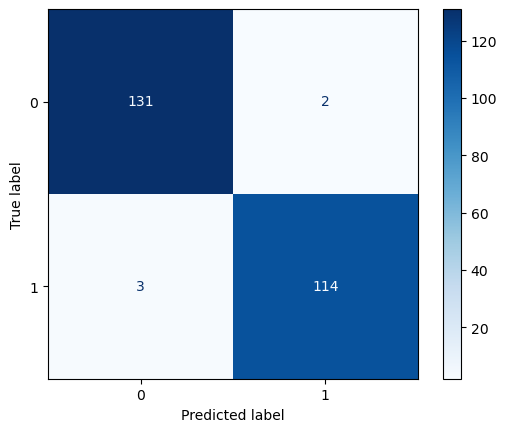

In [29]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [30]:
# Deriving and storing the metrics
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

performance = pd.concat([performance, pd.DataFrame({'model':"Neural network GridSearchCV", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

performance

,model,Accuracy,Precision,Recall,F1
0,logistic regression,0.980,0.982759,0.974359,0.978541
0,Neural network default,0.964,0.982143,0.940171,0.960699
0,Neural network RandomSearchCV,0.980,0.982759,0.974359,0.978541
0,Neural network GridSearchCV,0.980,0.982759,0.974359,0.978541


### Conclusion


Based on the above performance metrics, let's discuss the performance of the above models:

1. Logistic Regression:

   Logistic regression achieved a high accuracy of 0.980, indicating that it correctly predicted 98% of the samples. The precision of 0.982759 suggests that when it predicted a positive outcome, it was correct 98.28% of the time. The recall of 0.974359 indicates that it identified 97.44% of the positive samples correctly. The F1-Score, which considers both precision and recall, is 0.978541. Overall, these results indicate that logistic regression performed very well, with high accuracy and balanced precision and recall.

2. Neural Network (Default):

   The default neural network achieved an accuracy of 0.964, which is slightly lower than logistic regression. The precision of 0.982143 suggests that it had a high rate of correctly identifying positive samples. However, the recall of 0.940171 indicates that it missed identifying some positive samples. The F1-Score of 0.960699 considers both precision and recall, showing a balanced performance but slightly lower than logistic regression.

3. Neural Network (RandomSearchCV):

   The neural network trained with RandomSearchCV achieved the same performance metrics as logistic regression, which is impressive. It attained an accuracy of 0.980, similar precision and recall values, and an F1-Score of 0.978541. This indicates that the random search for hyperparameter optimization resulted in a neural network model that performed equally well as the logistic regression model.

4. Neural Network (GridSearchCV):

   The neural network trained with GridSearchCV upon the RandomSearchCV also achieved the same performance metrics as both logistic regression and the neural network with RandomSearchCV. It obtained an accuracy of 0.980, precision and recall values matching those of the other models, and an F1-Score of 0.978541. This implies that the grid search for hyperparameter optimization did not yield significant improvement to the neural network with RandomSearchCV model.

Overall, logistic regression and the neural network models (with both random and grid search hyperparameter tuning) performed exceptionally well, with high accuracy, precision, recall, and F1-Scores. The neural network models achieved performance on par with logistic regression, indicating their ability to learn complex patterns and generalize to unseen data. However Neural networks also consumed lot of time to come up with results. The choice between these models would depend on various factors such as interpretability, computational complexity, and specific requirements of the problem at hand. Since the modelling in done with the use of synthetic data, I cannot evaluate the costs associated with false positives and false negatives. 